<a href="https://colab.research.google.com/github/arzuantor/Linear-Regression/blob/main/leaner_rigression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Libraries



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Load Data

In [12]:
df=pd.read_csv('/content/data (1) - data (1).csv')

In [13]:
df.head(2)

,x,y
0,48.955889,60.723602
1,44.687196,82.892504


#Data Analysis

Null value check


In [14]:
df.isna().sum()

,0
x,0
y,0


duplicate value check

In [15]:
df.duplicated().sum()

np.int64(0)

info check


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       99 non-null     float64
 1   y       99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


#visulaization

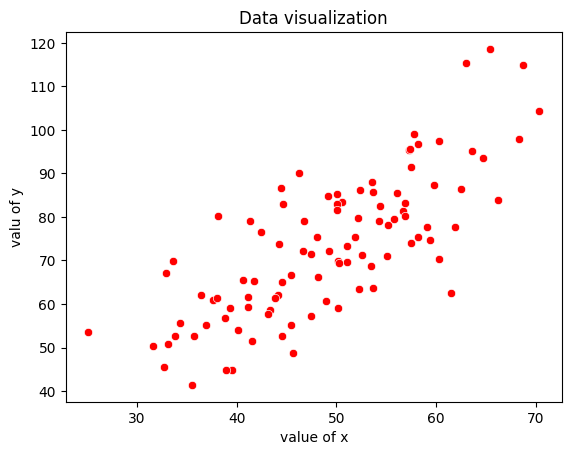

In [20]:
sns.scatterplot(x=df.x, y=df.y, color="r")
plt.xlabel("value of x")
plt.ylabel("valu of y")
plt.title("Data visualization")
plt.show()

#check data correlation